In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Look at data

### Show data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

### Null values

<AxesSubplot:>

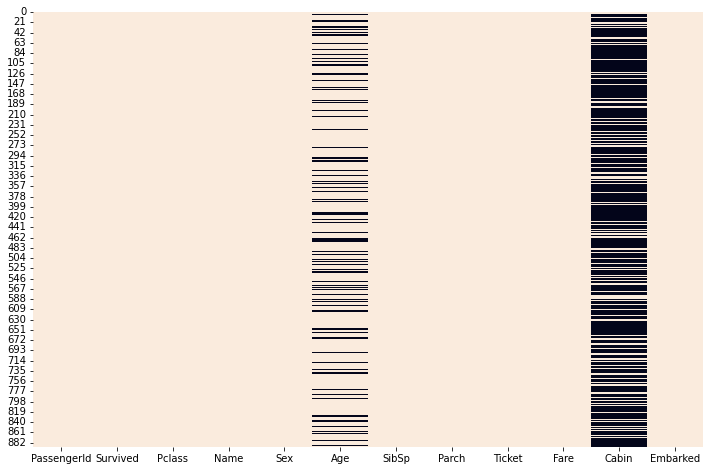

In [6]:
plt.subplots(figsize=(12,8))
sns.heatmap(train.isnull(), cmap='rocket_r', cbar=False)

**Observations**
* statistics for train and test set are similar
* drop Cabin becaouse of nulls


# Analyzing

### Numerical values

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

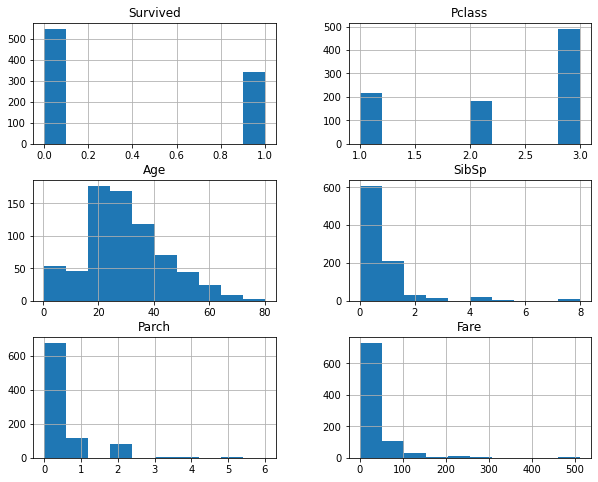

In [9]:
train.drop("PassengerId", axis=1).hist(figsize=(10,8))

In [10]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

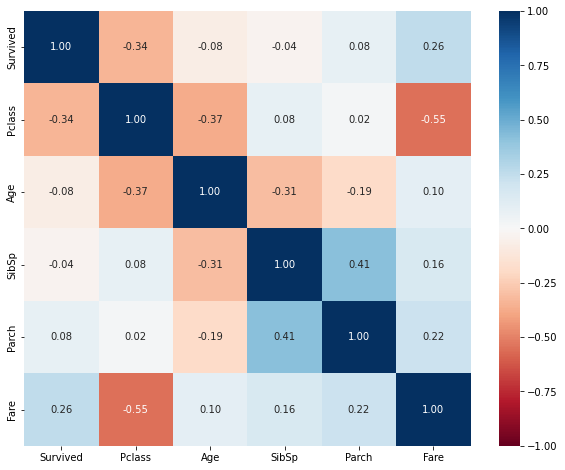

In [11]:
plt.subplots(figsize=(10,8))
sns.heatmap(train.drop(["PassengerId"], axis=1).corr(),
            cmap='RdBu', annot=True, fmt='.2f', cbar=True, vmin=-1, vmax=1)

#### Pclass and Fare

<AxesSubplot:xlabel='Pclass', ylabel='mean survive'>

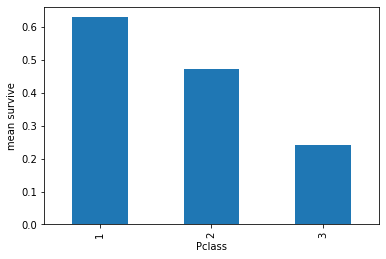

In [12]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar', ylabel='mean survive')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

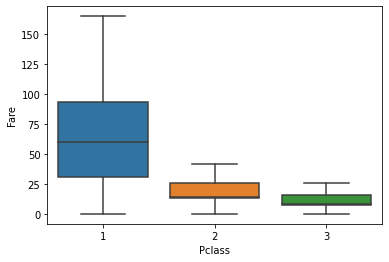

In [13]:
sns.boxplot(x="Pclass", y="Fare", data=train, showfliers=False)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

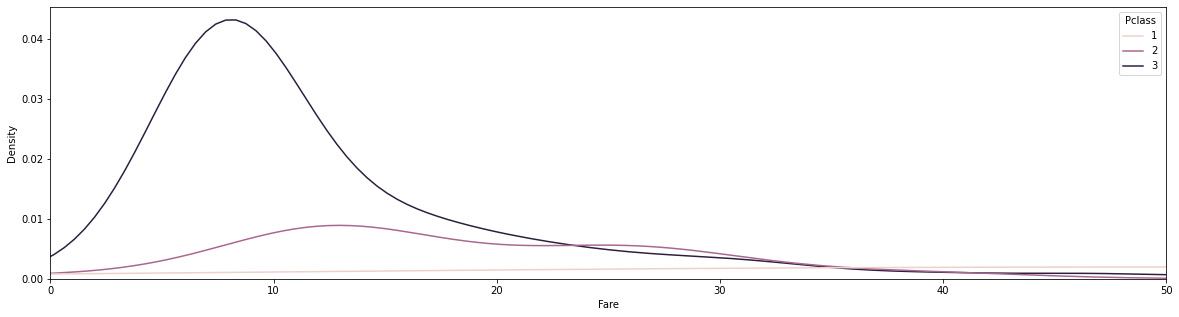

In [14]:
plt.figure(figsize=(20,5))
plt.xlim(0, 50)
sns.kdeplot(data=train, x="Fare", hue="Pclass")

In [15]:
print(pd.qcut(train[train['Pclass'] == 1]['Fare'], 4).cat.categories.right)
print(pd.qcut(train[train['Pclass'] == 2]['Fare'], 4).cat.categories.right)
print(pd.qcut(train[train['Pclass'] == 3]['Fare'], 4).cat.categories.right)

Float64Index([30.924, 60.287, 93.5, 512.329], dtype='float64')
Float64Index([13.0, 14.25, 26.0, 73.5], dtype='float64')
Float64Index([7.75, 8.05, 15.5, 69.55], dtype='float64')


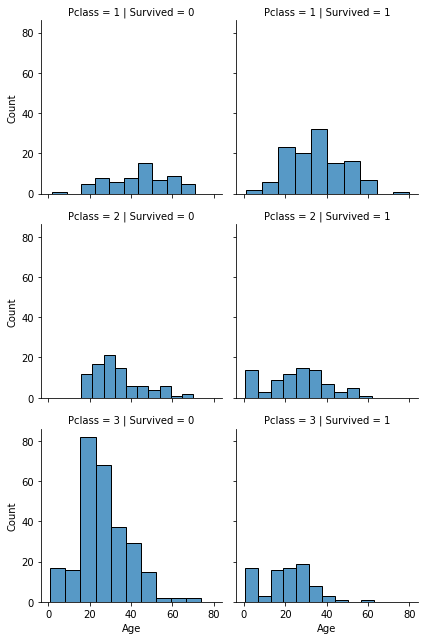

In [16]:
g = sns.FacetGrid(train, row="Pclass", col="Survived")
g.map_dataframe(sns.histplot, x="Age", bins=10)

In [17]:
pd.qcut(train['Fare'], 4).cat.categories.right

Float64Index([7.91, 14.454, 31.0, 512.329], dtype='float64')

#### Age

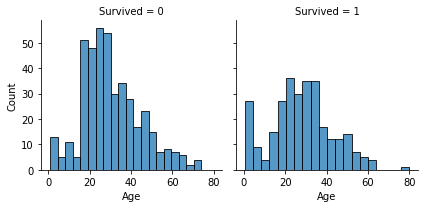

In [18]:
g = sns.FacetGrid(train, col="Survived")
g.map_dataframe(sns.histplot, x="Age", bins=20)

#### SibSp and Parch

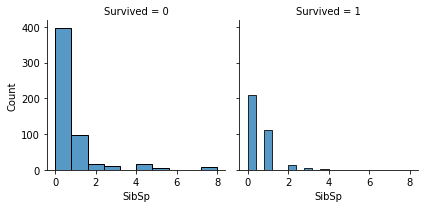

In [19]:
g = sns.FacetGrid(train, col="Survived")
g.map_dataframe(sns.histplot, x="SibSp", bins=10)

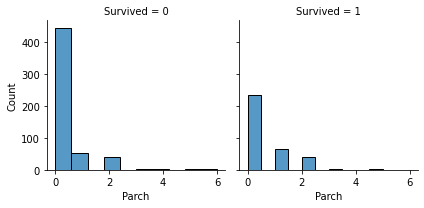

In [20]:
g = sns.FacetGrid(train, col="Survived")
g.map_dataframe(sns.histplot, x="Parch", bins=10)

<AxesSubplot:xlabel='WithSibSp', ylabel='mean survive'>

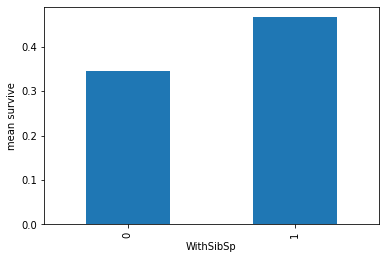

In [21]:
df_tmp = train.copy()
df_tmp["WithSibSp"] = np.where(train["SibSp"] > 0, 1, 0)

df_tmp.groupby('WithSibSp')['Survived'].mean().plot(kind='bar', ylabel='mean survive')

<AxesSubplot:xlabel='WithParch', ylabel='mean survive'>

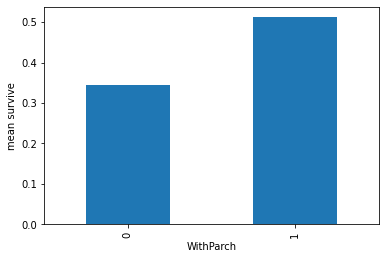

In [22]:
df_tmp = train.copy()
df_tmp["WithParch"] = np.where(train["Parch"] > 0, 1, 0)

df_tmp.groupby('WithParch')['Survived'].mean().plot(kind='bar', ylabel='mean survive')

<AxesSubplot:xlabel='WithFamily', ylabel='mean survive'>

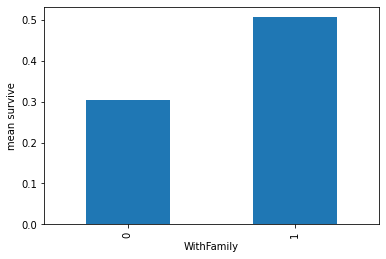

In [23]:
df_tmp = train.copy()
df_tmp["WithFamily"] = np.where((train["SibSp"] > 0) | (train["Parch"] > 0), 1, 0)

df_tmp.groupby('WithFamily')['Survived'].mean().plot(kind='bar', ylabel='mean survive')

**Observations**
* higher Pclass = lower survival rate
* Pclass coreelated with Fare
* SibSp correlated with Parch (family trips)
* passengers with family = higher survival rate
* Age, SibSp, Parch not coerelated

### Categorical values

#### Sex

<AxesSubplot:xlabel='Sex', ylabel='mean survive'>

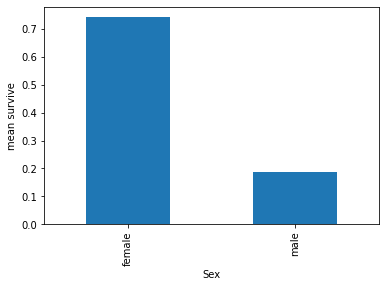

In [24]:
train.groupby('Sex')['Survived'].mean().plot(kind='bar', ylabel='mean survive')

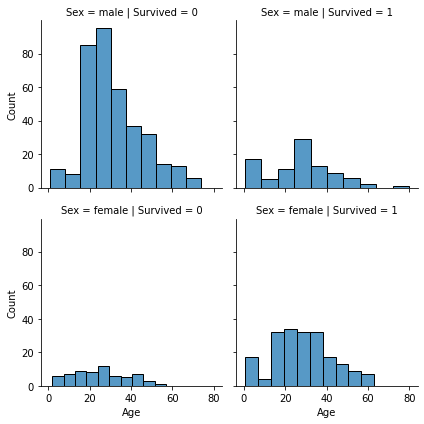

In [25]:
g = sns.FacetGrid(train, row="Sex", col="Survived")
g.map_dataframe(sns.histplot, x="Age", bins=10)

#### Embarked

<AxesSubplot:xlabel='Embarked', ylabel='mean survive'>

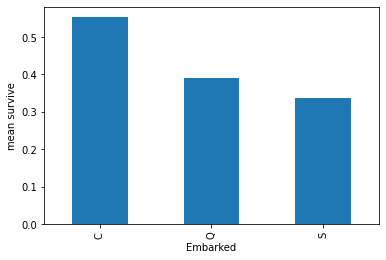

In [26]:
train.groupby('Embarked')['Survived'].mean().plot(kind='bar', ylabel='mean survive')

<AxesSubplot:xlabel='Embarked', ylabel='mean fare'>

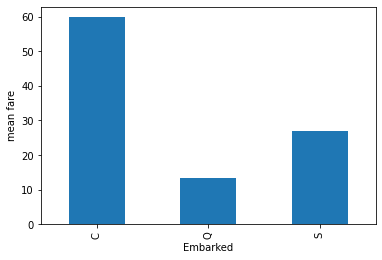

In [27]:
train.groupby('Embarked')['Fare'].mean().plot(kind='bar', ylabel='mean fare')

# Prepare data

In [28]:
X_train = train.drop("Survived", axis=1)
X_test = test.copy()
y_train = train["Survived"]

for df in [X_train, X_test]:
    # Age fillna
    df['Age'].fillna(train['Age'].dropna().mean(), inplace=True)
    # Age cut -> numeric / onehotencoder 0-16-32-rest
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[df['Age'] > 32, 'Age'] = 2
    df['Age'] = df['Age'].astype(int)
    
    # SibSp, Parch -> WithFamily
    df["WithFamily"] = np.where((df["SibSp"] > 0) | (df["Parch"] > 0), 1, 0)
    
    # Fare fillna
    for i_class in range(1,4):
        df.loc[(df['Fare'].isna()) & (df['Pclass'] == i_class), 'Fare'] = train[train['Pclass'] == i_class]['Fare'].mean()
    # Fare cut -> numeric / onehotencoder (-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31.0), 'Fare'] = 2
    df.loc[df['Fare'] > 31.0, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
    
    # Sex -> numeric
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    # Embarked fillna
    df.loc[df['Embarked'].isna() & (df['Fare'] <= 20), 'Embarked'] = 'Q'
    df.loc[df['Embarked'].isna() & (df['Fare'] > 20) & (df['Fare'] <= 40), 'Embarked'] = 'S'
    df.loc[df['Embarked'].isna() & (df['Fare'] > 40), 'Embarked'] = 'C'
    # Embarked -> numeric / onehotencoder
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
    
    # Drop 'PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [29]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,WithFamily
0,3,1,1,0,2,1
1,1,0,2,3,0,1
2,3,0,1,1,2,0
3,1,0,2,3,2,1
4,3,1,2,1,2,0


# Model

### Check base models

In [30]:
svm = SVC()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
mlp = MLPClassifier()

In [31]:
for model in [svm, tree, rf, adaboost, xgb, xgbrf, mlp]:
    print("Accuracy for {0:23} = {1}".format(str(model).split("(")[0], np.round(cross_val_score(model, X_train, y_train, cv=5).mean(), 3)))

Accuracy for SVC                     = 0.808
Accuracy for DecisionTreeClassifier  = 0.804
Accuracy for RandomForestClassifier  = 0.806
Accuracy for AdaBoostClassifier      = 0.781
Accuracy for XGBClassifier           = 0.805
Accuracy for XGBRFClassifier         = 0.802


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy for MLPClassifier           = 0.791


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Hyperparameters

### SVM

In [32]:
params = [
    {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
]

grid_svm = GridSearchCV(svm, params, cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'sigmoid']},
                         {'C': [0.1, 1.0, 10.0], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}])

In [33]:
grid_svm.best_estimator_

SVC(C=10.0, gamma='auto', kernel='poly')

In [34]:
grid_svm.best_score_

0.8181783943255289

#### Random Forest

In [35]:
params = [
    {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', None]},
    {'n_estimators': [500, 1000], 'max_features': ['sqrt'], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 10, 20]}
]

grid_rf = GridSearchCV(rf, params, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': ['sqrt', None],
                          'n_estimators': [50, 100, 200]},
                         {'max_depth': [5, 10, None], 'max_features': ['sqrt'],
                          'min_samples_leaf': [1, 10, 20],
                          'n_estimators': [500, 1000]}])

In [36]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=1000)

In [37]:
grid_rf.best_score_

0.810344611135522

### XGBClassifier

In [38]:
params = [
    {'learning_rate': [0.8, 1.0, 1.2], 'subsample': [0.6, 0.8, 0.9], 'colsample_bynode': [0.7, 0.8, 0.9], 'reg_lambda': [1e-06, 1e-05, 1e-04]}
]

grid_xgb = GridSearchCV(xgb, params, cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [39]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.7, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.0001, ...)

In [40]:
grid_xgb.best_score_

0.8092398468394955

### Voting classifier

In [41]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('svm', svm), ('rf', rf), ('xgbrf', xgbrf)], voting='hard')
cv = cross_val_score(clf, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.81005587, 0.78089888, 0.82022472, 0.80337079, 0.8258427 ]),
 0.8080785889146946)

In [42]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('svm', SVC(C=10.0, gamma='auto', kernel='poly')),
                                   ('rf', RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=500)),
                                   ('xgb', XGBClassifier(learning_rate=0.8, colsample_bynode=0.7, reg_lambda=1e-04))],
                       voting='hard')
cv = cross_val_score(clf, X_train, y_train, cv=5)
cv, cv.mean()

(array([0.79888268, 0.79775281, 0.83146067, 0.79213483, 0.84269663]),
 0.8125855250768941)

# Final predictions

In [43]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
submission = pd.DataFrame({"PassengerId": test['PassengerId'], "Survived": y_pred})

In [46]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
submission.to_csv('submission.csv', index=False)